# Exploratory Data Analysis (EDA) Notebook
 
## Objectives:
- Understand the distribution of the data.
- Identify patterns, correlations, and trends.
- Detect potential outliers and missing values.
- Generate visualizations to summarize key insights.

In [ ]:
1. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configure visualization settings
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

2. Load Data

In [2]:
# Load datasets
train_data_path = '/workspace/bicycle_thefts_berlin/outputs/datasets/featured/TrainSet_Featured.csv'
test_data_path = '/workspace/bicycle_thefts_berlin/outputs/datasets/featured/TestSet_Featured.csv'

# Read CSV files
train_data = pd.read_csv(train_data_path)
test_data = pd.read_csv(test_data_path)

# Display data overview
print("Train Data Overview:")
print(train_data.info())
print(train_data.head())

print("\nTest Data Overview:")
print(test_data.info())
print(test_data.head())

Train Data Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34508 entries, 0 to 34507
Data columns (total 16 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ANGELEGT_AM                          34508 non-null  object 
 1   TATZEIT_ANFANG_STUNDE                34508 non-null  float64
 2   TATZEIT_ENDE_DATUM                   34508 non-null  object 
 3   TATZEIT_ENDE_STUNDE                  34508 non-null  int64  
 4   VERSUCH                              34508 non-null  object 
 5   ERFASSUNGSGRUND                      34508 non-null  object 
 6   ART_DES_FAHRRADS_Fahrrad             34508 non-null  bool   
 7   ART_DES_FAHRRADS_Herrenfahrrad       34508 non-null  bool   
 8   ART_DES_FAHRRADS_Kinderfahrrad       34508 non-null  bool   
 9   ART_DES_FAHRRADS_Lastenfahrrad       34508 non-null  bool   
 10  ART_DES_FAHRRADS_Mountainbike        34508 non-null  bool   
 11  ART_DES

/tmp/ipykernel_3273/2114112902.py:6: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  train_data = pd.read_csv(train_data_path)


3. Data Summary

In [3]:
# Check for missing values
print("Missing Values in Train Data:")
print(train_data.isnull().sum())

print("\nMissing Values in Test Data:")
print(test_data.isnull().sum())

# Summary statistics
print("\nSummary Statistics for Train Data:")
print(train_data.describe())

# Check the unique values in the target column
TARGET_COLUMN = 'VERSUCH'
print("\nUnique values in target column (VERSUCH):", train_data[TARGET_COLUMN].unique())

Missing Values in Train Data:
ANGELEGT_AM                            0
TATZEIT_ANFANG_STUNDE                  0
TATZEIT_ENDE_DATUM                     0
TATZEIT_ENDE_STUNDE                    0
VERSUCH                                0
ERFASSUNGSGRUND                        0
ART_DES_FAHRRADS_Fahrrad               0
ART_DES_FAHRRADS_Herrenfahrrad         0
ART_DES_FAHRRADS_Kinderfahrrad         0
ART_DES_FAHRRADS_Lastenfahrrad         0
ART_DES_FAHRRADS_Mountainbike          0
ART_DES_FAHRRADS_Rennrad               0
ART_DES_FAHRRADS_diverse FahrrÃ¤der    0
DELIKT_Keller- und Bodeneinbruch       0
TATZEIT_ANFANG_YEAR                    0
TATZEIT_ANFANG_MONTH                   0
dtype: int64

Missing Values in Test Data:
ANGELEGT_AM                            0
TATZEIT_ANFANG_STUNDE                  0
TATZEIT_ENDE_DATUM                     0
TATZEIT_ENDE_STUNDE                    0
VERSUCH                                0
ERFASSUNGSGRUND                        0
ART_DES_FAHRRADS_Fahrrad 

4. Distribution of Numeric Features

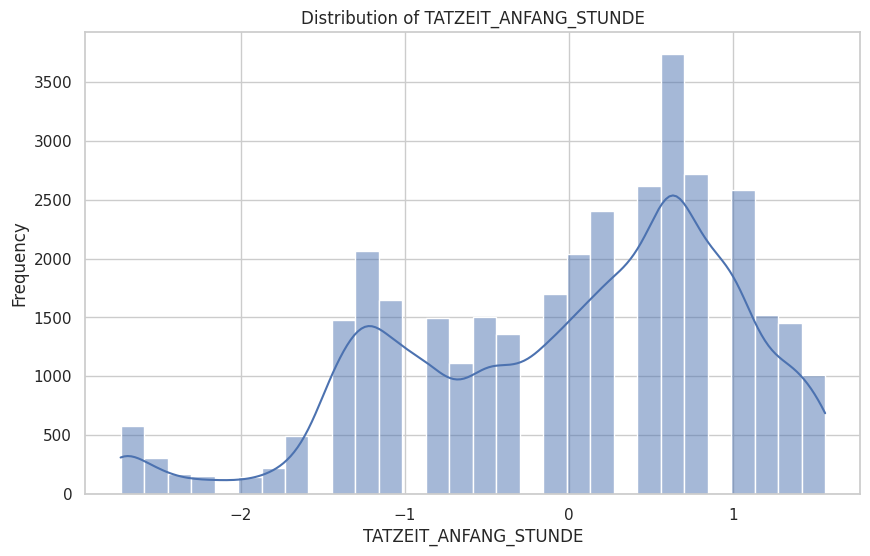

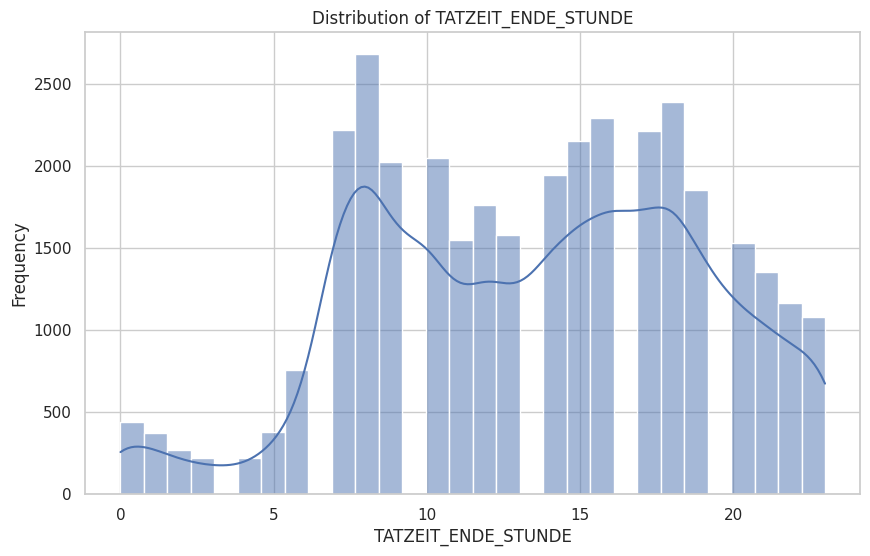

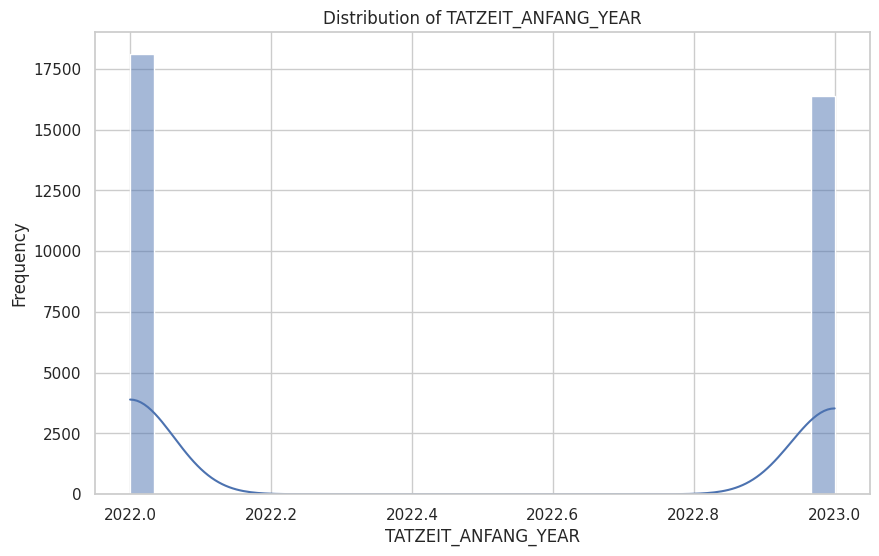

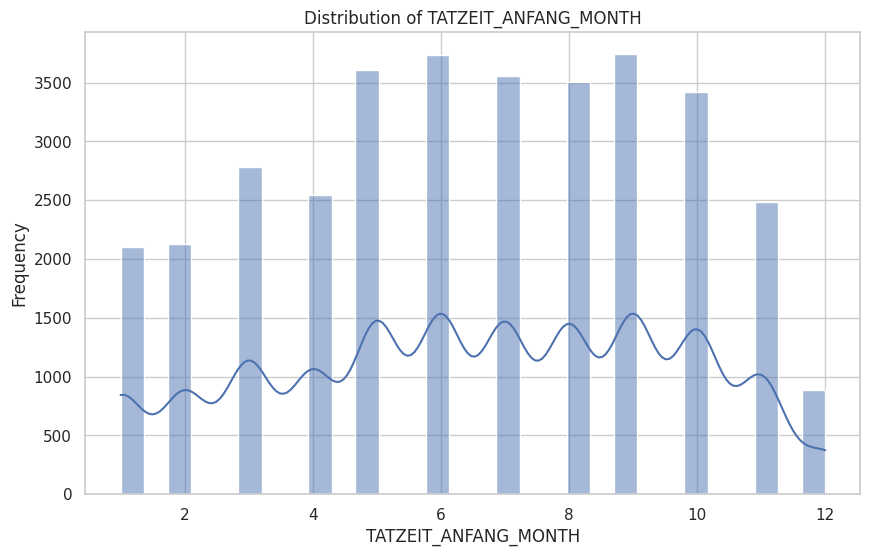

In [4]:
# Plot distributions of numeric features
numeric_columns = train_data.select_dtypes(include=["int64", "float64"]).columns

for col in numeric_columns:
    plt.figure()
    sns.histplot(train_data[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

5. Correlation Analysis

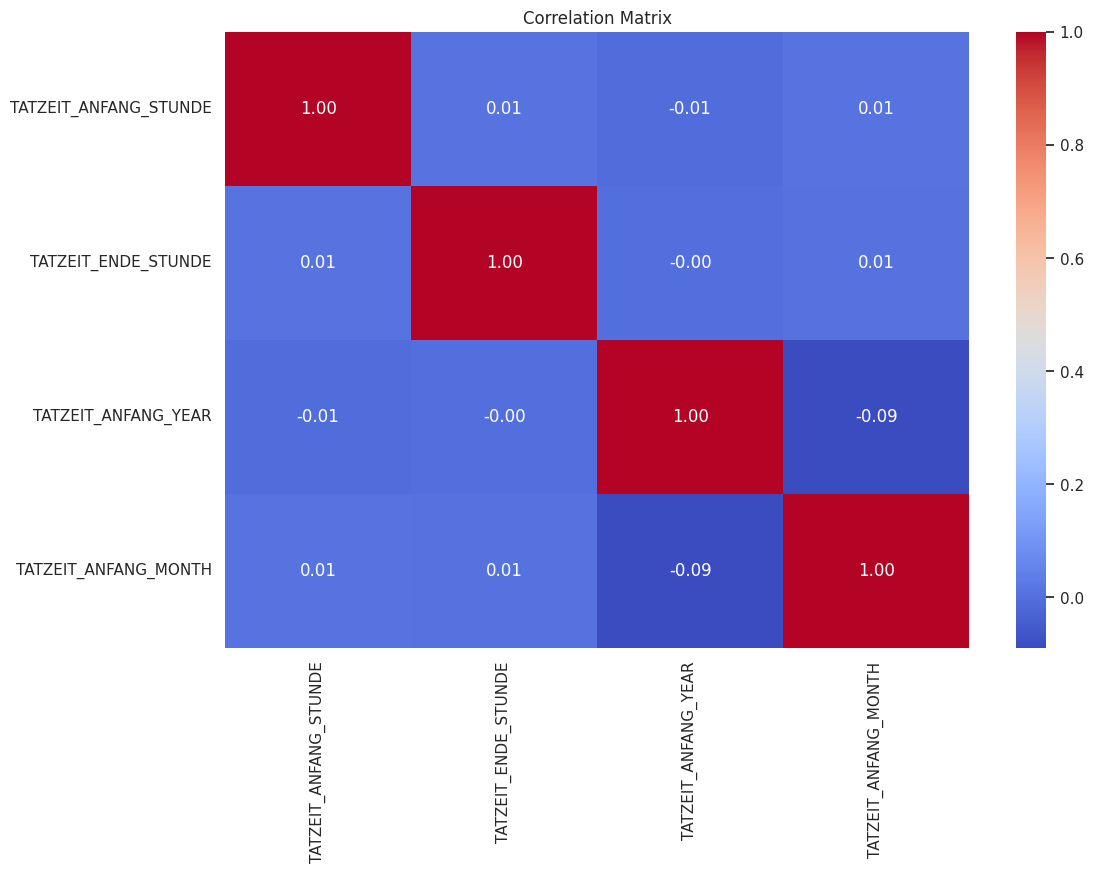

In [6]:
# Ensure only numeric columns are used for correlation
numeric_data = train_data.select_dtypes(include=["number"])

# Compute correlation matrix
correlation_matrix = numeric_data.corr()

# Visualize correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix")
plt.show()

6. Categorical Feature Analysis

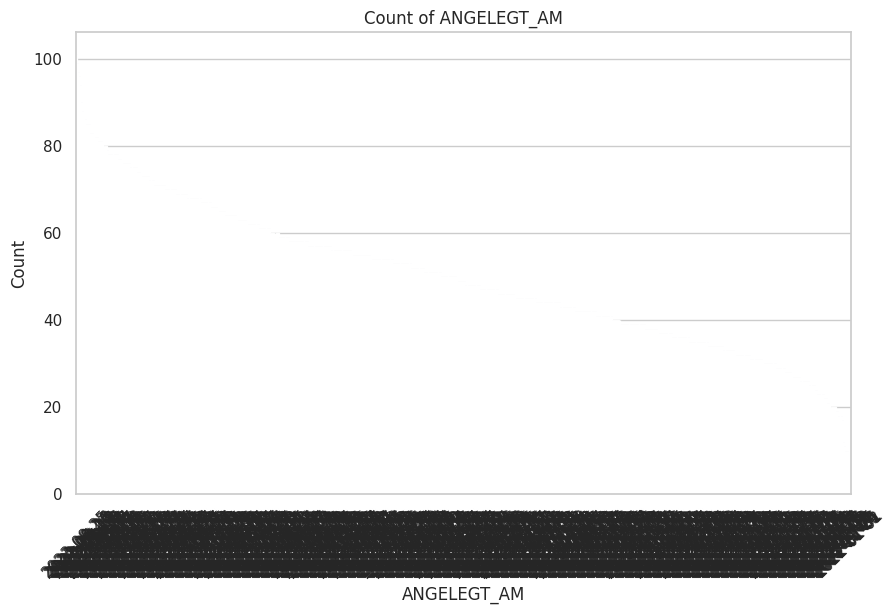

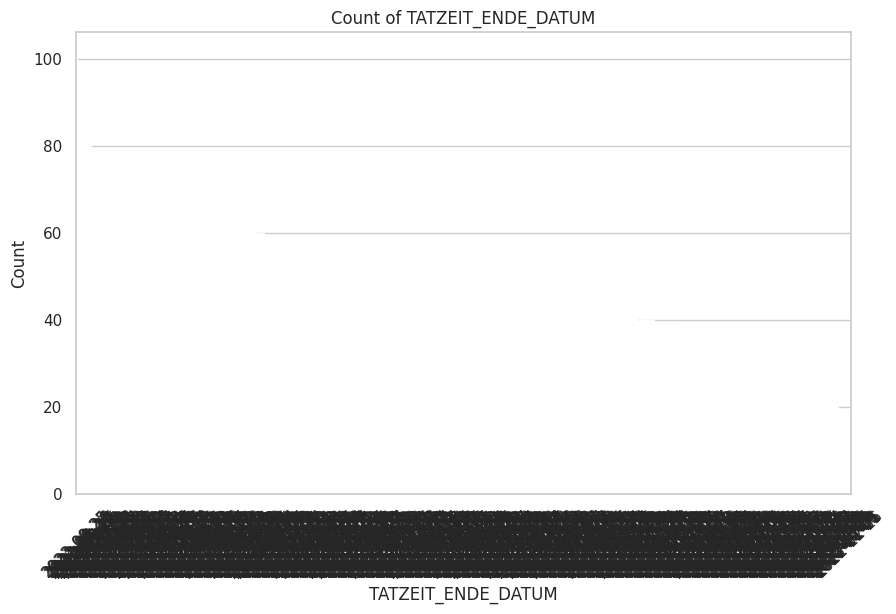

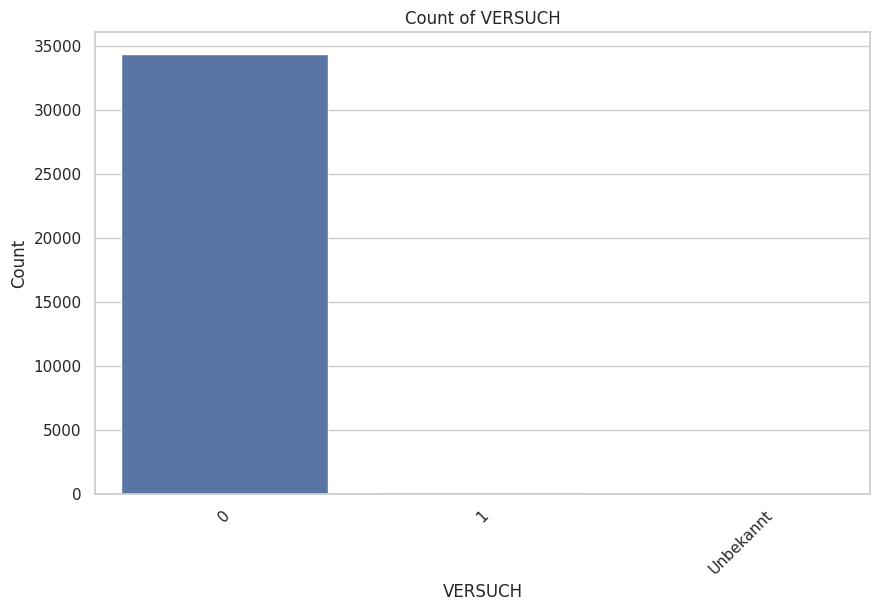

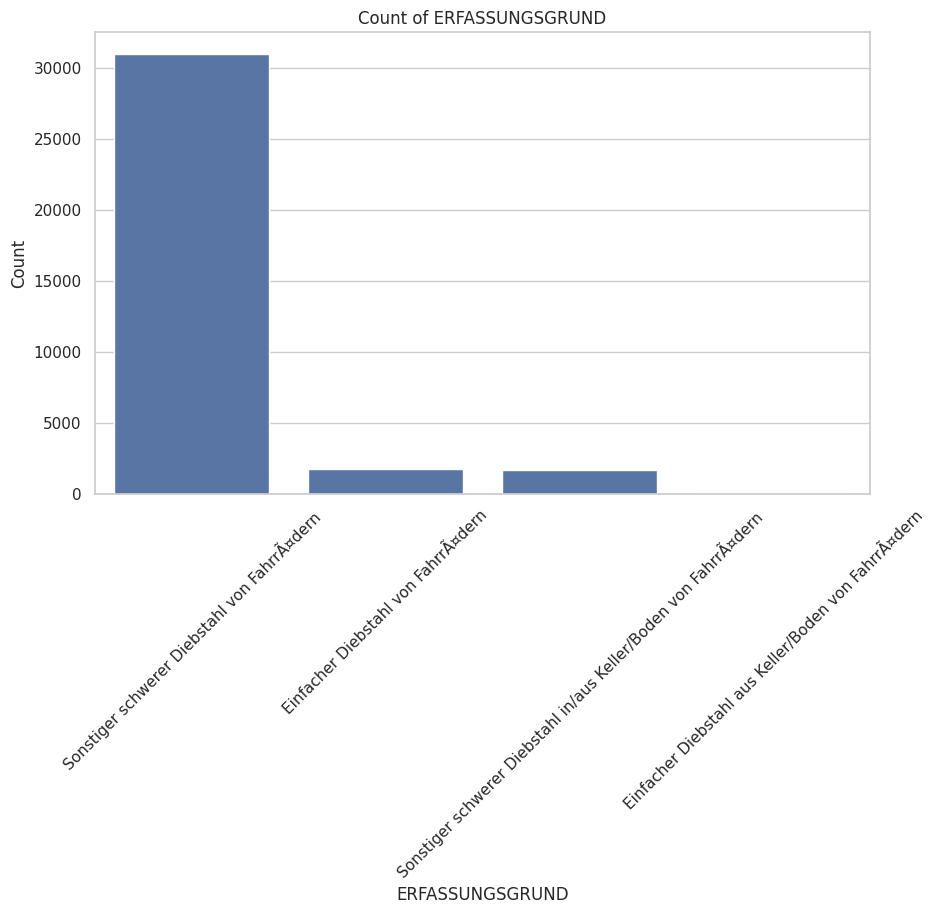

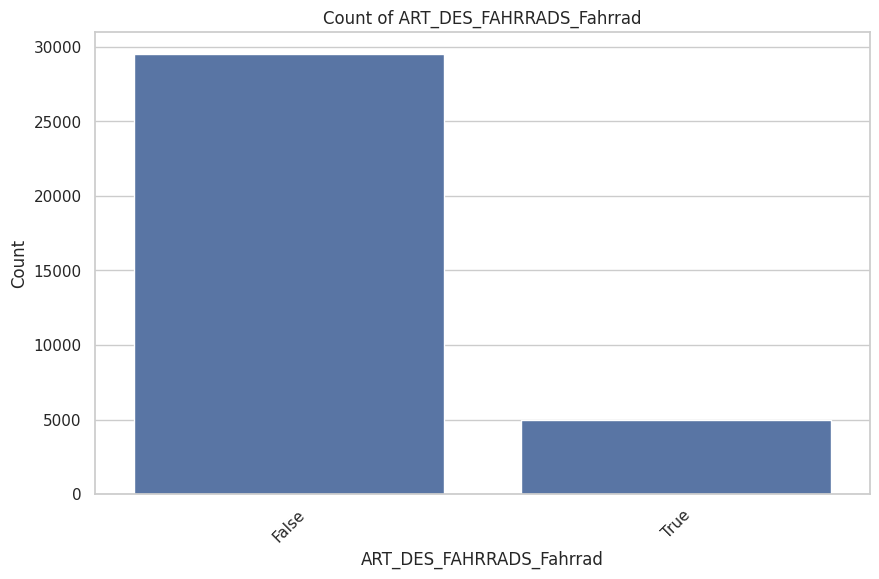

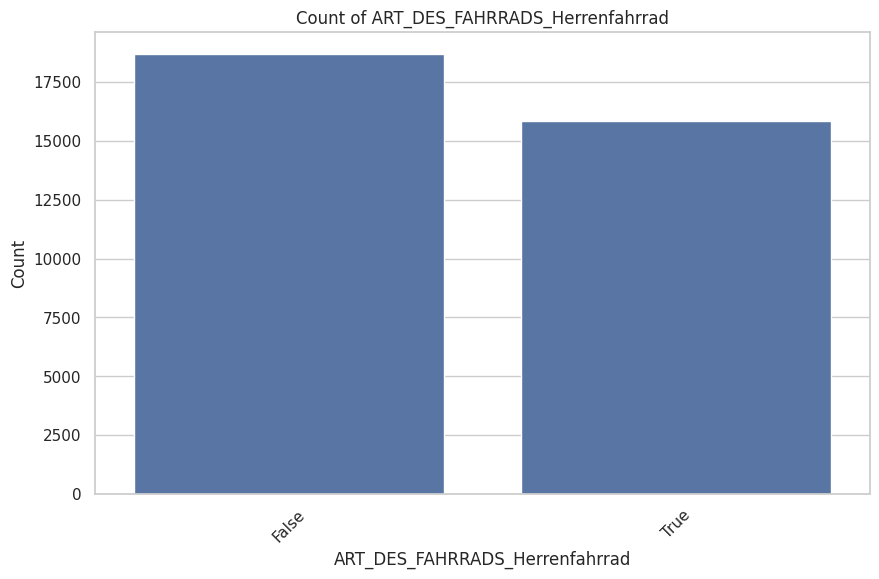

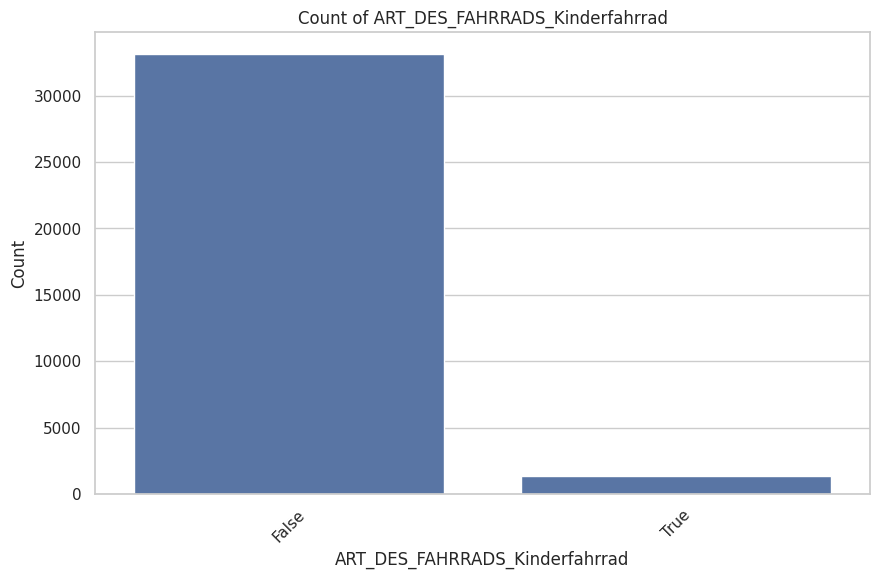

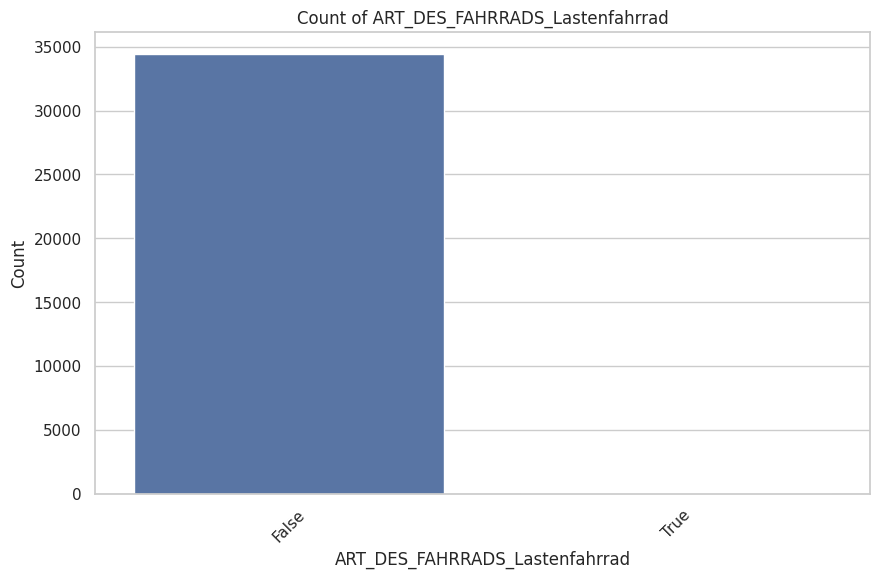

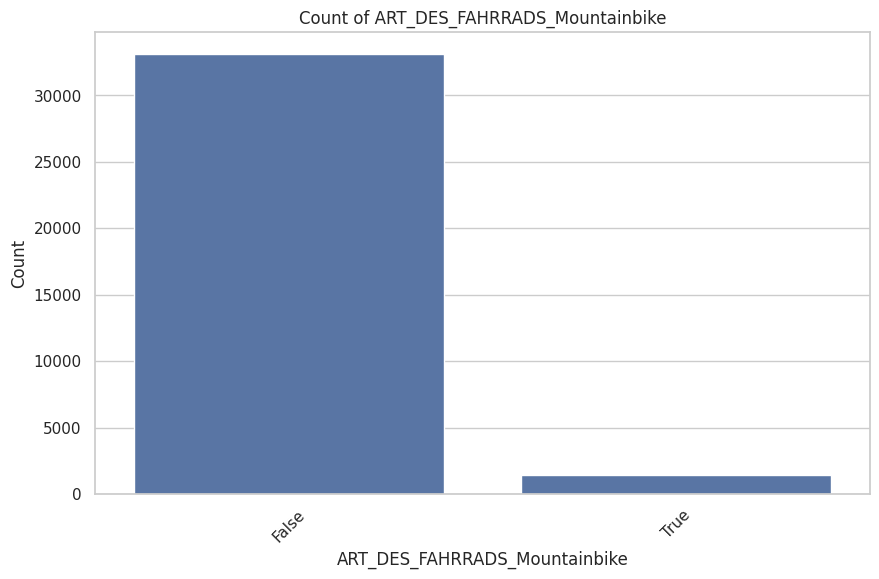

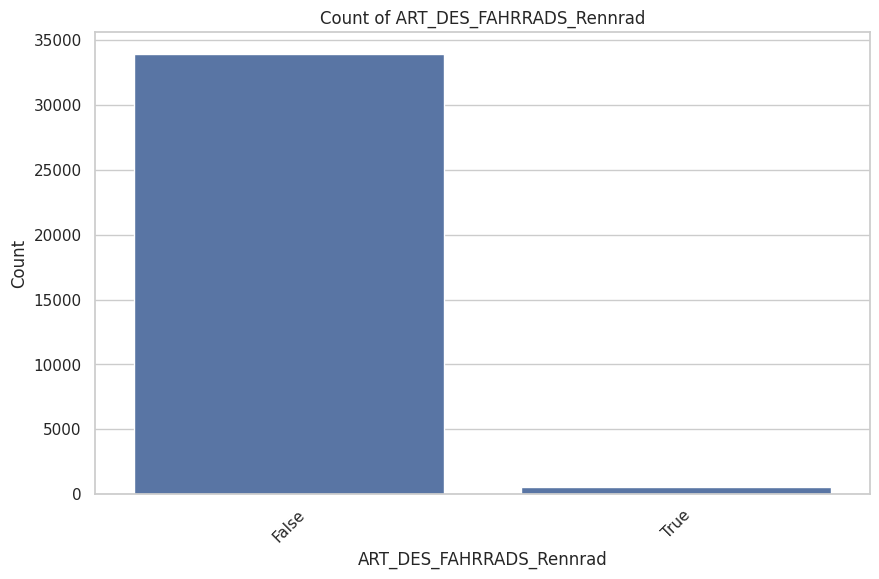

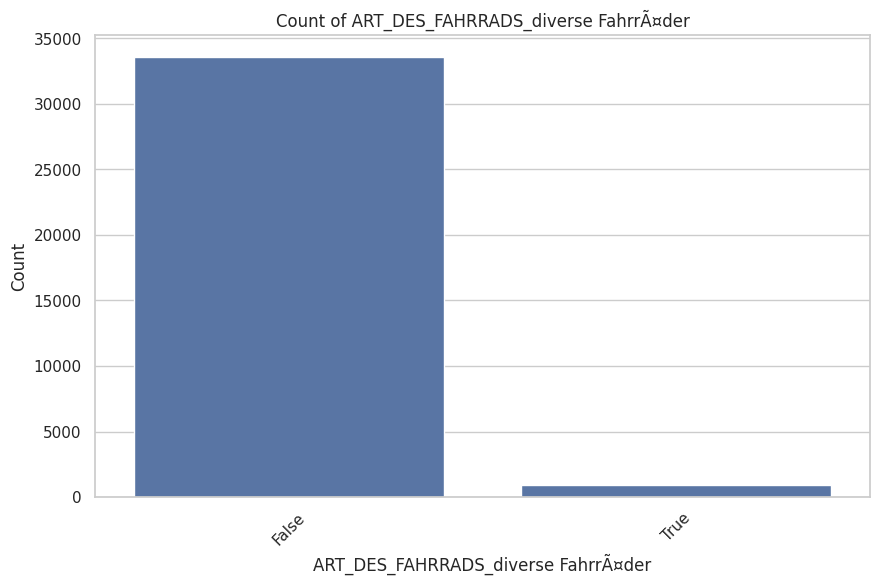

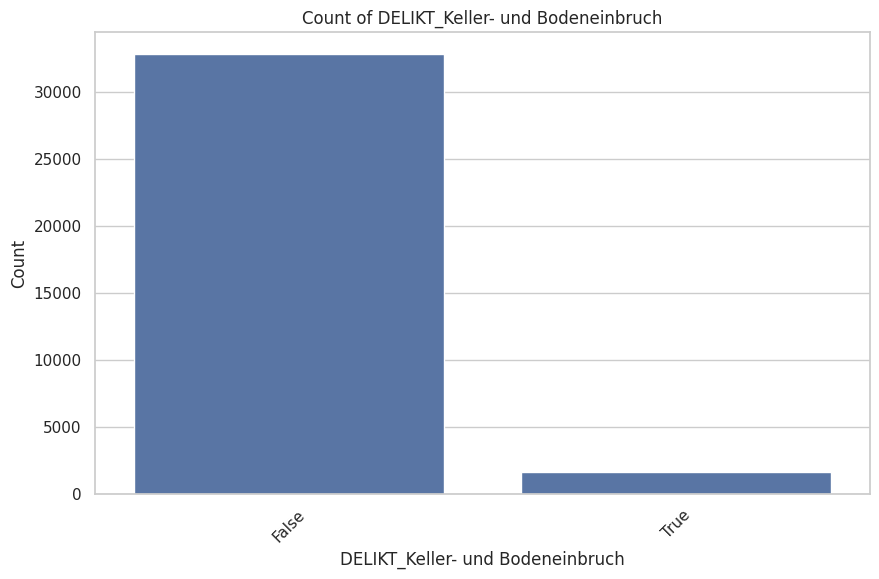

In [7]:
# Identify categorical columns
categorical_columns = train_data.select_dtypes(include=["object", "bool"]).columns

for col in categorical_columns:
    plt.figure()
    sns.countplot(data=train_data, x=col, order=train_data[col].value_counts().index)
    plt.title(f"Count of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.show()

7. Outlier Detection

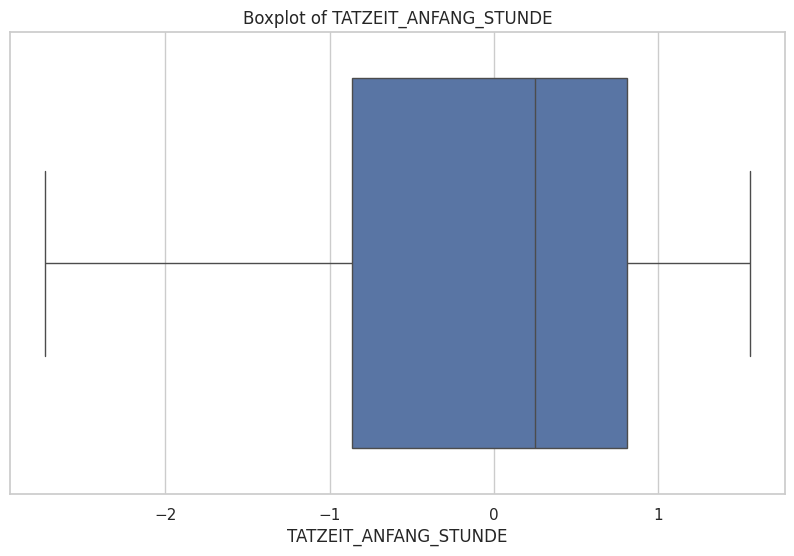

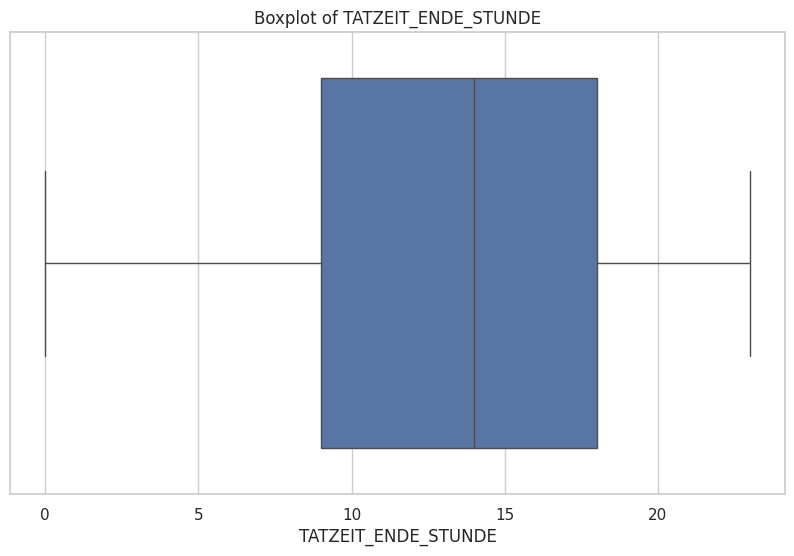

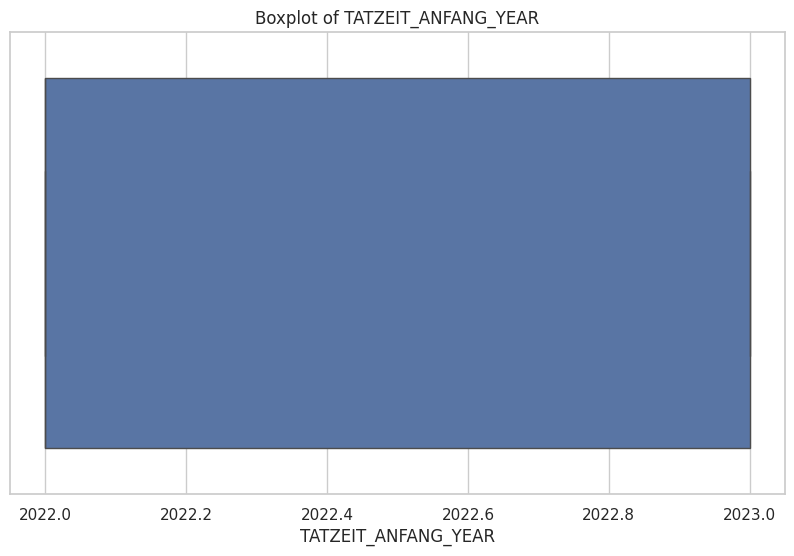

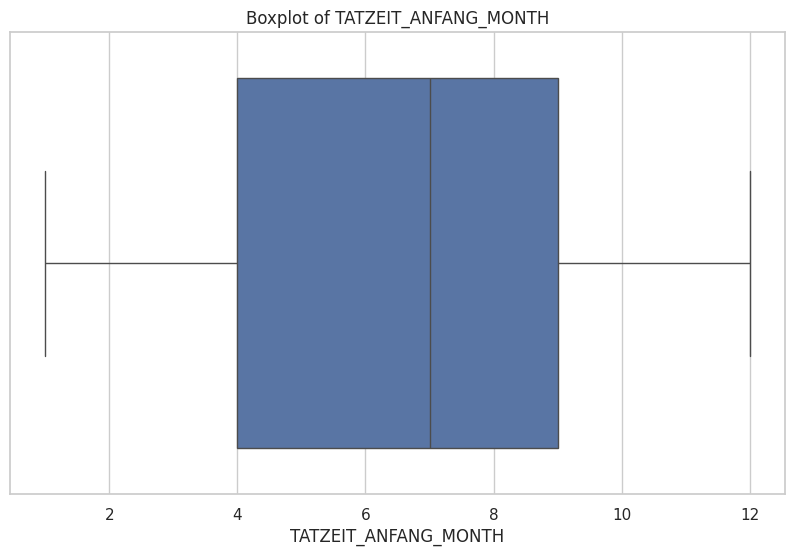

In [8]:
# Boxplots for numeric features
for col in numeric_columns:
    plt.figure()
    sns.boxplot(data=train_data, x=col)
    plt.title(f"Boxplot of {col}")
    plt.xlabel(col)
    plt.show()